<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 31st Jan, 2021
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 308-312
# Using keras functional API

In [44]:
# 1.0 Import libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [45]:
# 1.1 Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [46]:
# 2.0 Get Data
#     The data needs little processing
housing = fetch_california_housing(return_X_y= False)
type(housing)   # sklearn.utils.Bunch

sklearn.utils.Bunch

In [47]:
# 2.1 Seperate X,y
X = housing.data
y = housing.target
X.shape   # (20640, 8)

(20640, 8)

In [48]:
# 2.2 Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [49]:
# 2.3 Show data field names
#print(housing.DESCR)
#housing.feature_names

In [50]:
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(16512, 8)

(4128, 8)

# Our models<br>
We will construct the following three models:

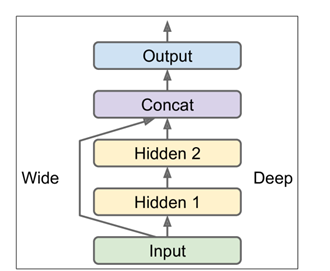

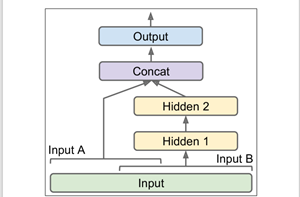

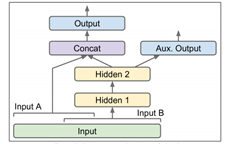

# Wide and Deep Network--Ist version

In [ ]:
# 3.1 Design model

# 3.1.1 Inputs to model. Note that inputs is NOT
#       a part of layers object
inputs = tf.keras.Input(shape = X.shape[1:])
# 3.1.2 Add layers
x = layers.Dense(100, activation = 'relu')(inputs)
x = layers.Dense(100, activation = 'relu')(x)
x = tf.keras.layers.concatenate([x,inputs])
out = layers.Dense(1,activation = 'sigmoid')(x)
# 3.1.3 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [ ]:
# 3.2 Print model summary
model.summary()

In [ ]:
# 3.3 `Model` groups layers into an object 
#       with training and inference features.
help(Model)

In [ ]:
# 3.4 Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model, show_shapes= True)

In [ ]:
# 3.5 Compile model
model.compile(loss = "mean_squared_error")
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 10,
                    verbose = 1
                    )

In [ ]:
3.6 model.evaluate(X_test,y_test)

# Wide and Deep Network--IInd version

In [ ]:
# 4.0 We have two inputs
inputsA = tf.keras.Input(shape = X_train[:,:4].shape[1:])
inputsB = tf.keras.Input(shape = X_train[:,1:8].shape[1:])

In [ ]:
# 4.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)


In [ ]:
# 4.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,inputsA])

In [ ]:
# 4.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)


In [ ]:
# 4.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])
model2.summary()

In [ ]:
# 4.5 Compile model
model2.compile(
               optimizer='rmsprop', 
               loss = 'mean_squared_error'
               )

# 4.6 Train the model now.
#     Note the two train inputs
model2.fit(
            [X_train[:,:4], X_train[:,1:8]],
            y_train,
            epochs = 100
           )

In [ ]:
# 4.7 Plot our model
plot_model(model2)

# Two inputs and two outputs model--IIIrd ver

In [ ]:
# 5.0 We have two inputs.
#     To distiguish them, we give names to each
inputsA = tf.keras.Input(
                          shape = X_train[:,:4].shape[1:],
                          name = "in_a"
                         )

# 5.1
inputsB = tf.keras.Input(
                          shape = X_train[:,1:8].shape[1:],
                          name = "in_b"
                        )


# 5.2 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 5.3 Concatenate an input with output of one arm
concat = layers.concatenate([x,inputsA])

# 5.4 Output layers
#     We have two output layers. To distiguish them, we give names to each
out_x = layers.Dense(1,activation = 'sigmoid' , name = "out_a")(concat)
out_y = layers.Dense(1,activation = 'sigmoid', name = "out_b")(x)

# 5.5 Create model and show summary
#     While outputs are two, model is one
main_model = Model(inputs = [inputsA,inputsB], outputs = [out_x, out_y])
main_model.summary()


In [ ]:
# 5.6 Plot the model now
plot_model(main_model, show_shapes = True)

In [51]:
#help(Model)

In [ ]:
help(main_model.fit)

In [ ]:
# 6.0 Compile model now
# Ref: Model.compile: 
#      https://wwwa.tensorflow.org/api_docs/python/tf/keras/Model

main_model.compile(
                     loss = ['mse', 'mse'],        # Could also be in dict() format
                     metrics = "mse",
                     loss_weights= {"out_a": 0.9,   # More weight to error here
                                    "out_b" : 0.1   # Less weight to error here
                                    }
                   )

In [ ]:
# 6.1
main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               [y_train,y_train],
               epochs = 100
           )

In [ ]:
# 6.2 One can also write outputs in a dictionary form, as:

main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               {
                   "out_a" : y_train,
                   "out_b" : y_train
               },
               epochs = 100
           )

In [ ]:
# 7.0 To evaluate, we must also supply two inputs
main_model.evaluate(
                     [X_test[:,:4],X_test[:,1:8]],
                      y_test
                    )

In [ ]:
########### It is done ##############